## Mahindra First Choice Data Analysis

### Problem Statements
    1. Geolocation Based Customer Analysis
        * Explore how various factors like make, model, time & type of service, etc vary with location.
            * Identifying the ownership pattern of cars throughout the country.
            * This also captures the problem wherein information regarding the spending patterns can be identified.
        * Identify the type of order each state receives and present it as an interactive visualization.
    2. Market Segmentation
        * Divide market of potential customers into internally homogeneous and mutually heterogeneous groups or segments.
            * To be based on different characteristics captured in the data.
     3. Customer Lifetime value prediction

#### Further Problem Statements
    1. Inventory Management and Recommendation
    2. Marketing Recommendation
    3. Customer Prediction

### The Data

* Dataset contains the following:
    1. Customer Data
    2. Invoice Data
    3. Joint Technical Data
    4. Plant Master

### Data Cleaning and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import sys
import time
import warnings

from matplotlib import pyplot as plt
from scipy import stats
from my_utils import *

warnings.filterwarnings("ignore")
np.set_printoptions(threshold=sys.maxsize)

In [3]:
invoice = pd.read_csv("redacted/data/Final_invoice.csv")

### Invoice

In [15]:
missing_df = check_null(invoice)
missing_df

Total Columns: 492314


,Number_Missing,% Missing,Missing?
Service Advisor Name,492314,100.000000,True
Claim No.,487510,99.024200,True
Policy no.,475432,96.570888,True
Expiry Date,470083,95.484386,True
Insurance Company,468723,95.208140,True
Cash /Cashless Type,464894,94.430384,True
Gate Pass Date,451399,91.689247,True
Technician Name,236834,48.106290,True
Total IGST,197286,40.073205,True
Total GST,197286,40.073205,True


In [16]:
recurring_df = check_recurring(invoice)
recurring_df

,Column,Unique Values,Not Null Values,Ratio to Total Number,Has Null
1,Amt Rcvd From Custom,1,295028,0.000003,True
2,Amt Rcvd From Ins Co,1,295028,0.000003,True
4,CGST(14%),1,295028,0.000003,True
5,CGST(2.5%),1,295028,0.000003,True
6,CGST(6%),1,295028,0.000003,True
7,CGST(9%),1,295028,0.000003,True
17,IGST(12%),1,295028,0.000003,True
18,IGST(18%),1,295028,0.000003,True
19,IGST(28%),1,295028,0.000003,True
20,IGST(5%),1,295028,0.000003,True


In [17]:
columns_to_drop = set()

# more than 90% missing values
for i in list(missing_df[missing_df['% Missing']>90].index):
    columns_to_drop.add(i)

# columns that have just a single value
for i in list(recurring_df[ recurring_df['Unique Values']==1]['Column']):
    columns_to_drop.add(i)

# dropping the columns
invoice.drop(columns=list(columns_to_drop), axis=1, inplace=True)

In [18]:
# dropping records where missing values are low
# not dropping `Model` as it may provide predictive power in areas with less data
invoice.drop(invoice[ invoice['Regn No'].isnull() | invoice['CITY'].isnull()].index,
             axis=0, inplace=True)

In [19]:
check_null(invoice)

Total Columns: 492297


,Number_Missing,% Missing,Missing?
Technician Name,236822,48.105514,True
ODN No.,197282,40.073777,True
Total Value,197282,40.073777,True
Area / Locality,23889,4.852559,True
Model,1524,0.309569,True


* Now the remaining fields <code>['Technician Name', 'Total Value', 'ODN No.']</code> remain with significant missing values.
* <code>Technician Name</code> may later prove useful for Customer Prediction.
* <code>ODN No.</code> contains unique values apart from those missing. It doesn't give much else information and doesn't seem to be of use for any other tasks. Will drop it.
* <code>Total Value</code> contains the values same as <code>Total Amt Wtd Tax.</code>, hence will be dropping it as well.

In [20]:
invoice.drop(columns=['Total Value', 'ODN No.'], axis=1, inplace=True)

In [21]:
invoice['Technician Name'].fillna(value='Missing', inplace=True)

In [22]:
check_null(invoice)

Total Columns: 492297


,Number_Missing,% Missing,Missing?
Area / Locality,23889,4.852559,True
Model,1524,0.309569,True


* Since the customer segmentation needs to be carried out on their geological location, the 4.8% missing values in `['Area / Locality']` needs to be imputed.
* This will be done using the <code>District</code> column and <code>Plant Master</code> data.

In [23]:
def clean_and_add_values(plant_property):
    property_index = []
    property_value_counts = plant_property.value_counts()
    if type(property_value_counts.index[0]) == str:
        property_index = [ x.lower() for x in list(property_value_counts.index)] 
    else:
        property_index = list(property_value_counts.index)
        
    property_values = list(property_value_counts.values)
    
    property_index_set = set(property_index)
    
    # if there's more than one value
    if len(property_index_set) > 1:
        # find the occurences of all the different values' case occurrences
        for i in property_index_set:
            property_index_occurences = [k for k, x in enumerate(property_index) if x == i]
            if len(property_index_occurences) > 1:
                # add multiple occurences of different case values
                for j in range(1, len(property_index_occurences)):
                    property_values[property_index_occurences[0]] += property_values[j]
                    property_values[j] = 0
                    
    property_cleaned_and_added = pd.Series(data=property_values, index=property_value_counts.index)
    property_cleaned_and_added = property_cleaned_and_added.sort_values(ascending=False)
    
    property_decided_value = \
        property_cleaned_and_added[property_cleaned_and_added == property_cleaned_and_added.iloc[0]].index[0]
    
    chosen_index = 1
    if type(property_decided_value) == str:
        if len(property_decided_value.strip()) < 2:
            while( property_decided_value in [',', '.', '..', '...']):
                property_decided_value = \
                    property_cleaned_and_added[property_cleaned_and_added == property_cleaned_and_added.iloc[chosen_index]].index[0]
                chosen_index += 1
    return property_decided_value

In [24]:
plants = list( set(invoice['Plant']))
plants.sort()

In [25]:
final_invoice = invoice.copy()

for i in range(0, len(plants)):
    
    j = plants[i]
    properties_to_clean = ['CITY', 'Area / Locality', 'District', 'Pin code', 'Plant Name1']
    
    for property_ in properties_to_clean:
        cleaned_property = clean_and_add_values(final_invoice[ final_invoice['Plant'] == j ][property_])
        final_invoice[property_] = np.where(final_invoice['Plant'] == j, cleaned_property, final_invoice[property_])
        
    print(' '*40, end="")
    print("\r{0}% completed".format(np.around( i/len(plants)*100, decimals=2)), end="")
    print("                                            \r", end="")
print("\r                                            ", end="")
print("\r100% Complete")

100% Complete                                               


In [26]:
invoice = final_invoice.copy()

* Across the invoice data, the same <code>Regn No</code> comes up more than once, indicating that some frequent customers exist.
* The number of times a car has visited the shop may aid in segmentation.

In [27]:
# imputing car models using number plate data
for number_plate in list(invoice[ invoice['Model'].isnull() ]['Regn No']):
    car_records = invoice[ invoice['Regn No'] == number_plate][['Customer No.', 'Make', 'Model']]
    
    if len(car_records[ car_records['Model'].notnull() ]) >= 1:
        car_model_value_counts = car_records['Model'].value_counts().sort_values(ascending=False)
        invoice['Model'] = np.where(invoice['Regn No'] == number_plate,
                                      car_model_value_counts.index[0], 
                                      invoice['Model'])

* Further imputation would require manual input or random values. This may introduce noise in the data.
* Dropping the remaining values.

In [28]:
invoice.drop(invoice[ invoice['Model'].isnull() ].index, axis=0, inplace=True)

In [29]:
# attaching freguency of car Regn No and Customer No
invoice = attach_frequency(invoice, 'Regn No')
invoice = attach_frequency(invoice, 'Customer No.')

In [30]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,...,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Regn No_frequency,Customer No._frequency
0,0,THANE,THANE,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,...,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,BC01FS1,5,5
1,1,THANE,THANE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,...,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,BC01SA2,6,6
2,2,THANE,THANE,Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,...,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,BC01SA2,3,3
3,3,THANE,THANE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,...,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,BC01SA2,6,6
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,...,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,BC01SA2,8,8


In [31]:
# checking to see if there is any imbalanced in customer no and regn no frequency
# imbalance would mean a car was owned by different 
invoice[ invoice['Regn No_frequency'] > invoice['Customer No._frequency']]

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,...,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Regn No_frequency,Customer No._frequency
261,261,THANE,THANE,Retail,E25519,Maharashtra,00:00:00,2015-01-30,7005200263,17:02:06,...,BC01,THANE,NO,0.0,MH04DN6210,SAMEER,1205.09,BC01SA1,52,11
292,292,PUNE,PUNE,Retail,68935,Maharashtra,00:00:00,2015-01-02,7006200007,17:23:54,...,BC02,PUNE,NO,0.0,MH12HY3999,umakant,299.92,BC02SA2,6,4
340,340,PUNE,PUNE,Retail,85418,Maharashtra,00:00:00,2015-01-09,7006200055,11:03:19,...,BC02,PUNE,NO,0.0,MH14CS4118,KIRAN,1002.18,BC02WM1,7,6
343,343,PUNE,PUNE,Retail,85418,Maharashtra,00:00:00,2015-01-09,7006200058,11:56:30,...,BC02,PUNE,NO,0.0,MH14CS4118,UMAKANT,0.00,BC02SA2,7,6
346,346,PUNE,PUNE,Retail,85418,Maharashtra,00:00:00,2015-01-09,7006200061,15:04:09,...,BC02,PUNE,NO,0.0,MH14CS4118,UMAKANT,419.74,BC02SA2,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490478,984330,RAMNAGAR,RAMNAGAR,Retail,202219,Uttarakhand,00:00:00,2016-06-28,7198600001,18:36:14,...,X243,X243 - JINDAL AUTOMOBILES,NO,0.0,UK04L4033,Missing,5702.70,X243SA1,3,2
490543,984395,NAMAKKAL,NAMAKKAL,Retail,198247,Tamil Nadu,00:00:00,2016-06-27,7199800098,19:23:38,...,X249,X249 - AMBUJA'S AUTOMOTIVES,NO,0.0,TN02AF9596,Missing,99.14,X249SA1,4,3
490557,984409,NAMAKKAL,NAMAKKAL,Retail,201671,Tamil Nadu,00:00:00,2016-06-28,7199800112,19:25:45,...,X249,X249 - AMBUJA'S AUTOMOTIVES,NO,0.0,TN28AC1810,Missing,99.14,X249SA1,2,1
490704,984556,SURAT,SURAT,Retail,195577,Gujarat,00:00:00,2016-06-30,7205801297,14:51:03,...,X279,X279 - J B CAR CARE,NO,0.0,GJ5JK0011,Missing,599.14,X279WM1,3,2


* There exist cars that have been owned by 2 or more known customers

In [32]:
invoice['Pre-owned_by_Known'] = (invoice['Regn No_frequency'] > invoice['Customer No._frequency']).astype(int)

In [33]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,...,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Regn No_frequency,Customer No._frequency,Pre-owned_by_Known
0,0,THANE,THANE,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,...,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,BC01FS1,5,5,0
1,1,THANE,THANE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,...,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,BC01SA2,6,6,0
2,2,THANE,THANE,Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,...,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,BC01SA2,3,3,0
3,3,THANE,THANE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,...,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,BC01SA2,6,6,0
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,...,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,BC01SA2,8,8,0


* Appending known previous owner's customer numbers

In [34]:
# grouped_obj = invoice.groupby('Regn No')

In [35]:
# owners_dict = {}

# for regn_no in grouped_obj.groups.keys():
#     occurrences = grouped_obj.groups[regn_no]

#     owners = set()
    
#     for index_location in occurrences:
#         owners.add(invoice.loc[index_location, 'Customer No.'])

#     owners_dict[regn_no] = list(owners)

In [36]:
# invoice['Owned By (customers)'] = -1
# invoice['Owned By (total number)'] = -1

# registration_numbers = list(set(invoice['Regn No']))
# total = len(registration_numbers)

# for sno, reg_no in enumerate(registration_numbers):
#     invoice['Owned By (customers)'] = np.where(invoice['Regn No'] == reg_no, str(owners_dict[reg_no]),
#                                                invoice['Owned By (customers)'])
#     invoice['Owned By (total number)'] = np.where(invoice['Regn No'] == reg_no, len(owners_dict[reg_no]),
#                                                  invoice['Owned By (total number)'])
#     print('\r{0}\r'.format(sno*100/total), end='')

# Saving Invoice

In [37]:
invoice.to_csv('invoice_cleaned.csv')

In [38]:
invoice = pd.read_csv('invoice_cleaned.csv', index_col=0)

In [39]:
invoice.head()

,Unnamed: 0.1,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,...,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Regn No_frequency,Customer No._frequency,Pre-owned_by_Known
0,0,THANE,THANE,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,...,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,BC01FS1,5,5,0
1,1,THANE,THANE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,...,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,BC01SA2,6,6,0
2,2,THANE,THANE,Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,...,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,BC01SA2,3,3,0
3,3,THANE,THANE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,...,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,BC01SA2,6,6,0
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,...,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,BC01SA2,8,8,0


#### Looking for usable features (different costs and ratios)

In [40]:
invoice[['Customer No.', 'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date', 'JobCard Time', 'KMs Reading', 'OSL Total', 'Parts Total', 'Labour Total', 'Misc Total', 'Total Amt Wtd Tax.']]

,Customer No.,Gate Pass Time,Invoice Date,Invoice Time,JobCard Date,JobCard Time,KMs Reading,OSL Total,Parts Total,Labour Total,Misc Total,Total Amt Wtd Tax.
0,67849,00:00:00,2015-01-02,11:30:36,2014-12-13,14:29:43,49317,500.06,2348.75,1203.14,0.00,4051.95
1,84419,00:00:00,2015-01-03,10:07:32,2015-01-02,14:12:18,78584,0.00,0.00,804.26,197.03,1001.29
2,81055,00:00:00,2015-01-03,11:12:57,2015-01-02,11:40:44,33985,0.00,52.95,180.19,0.00,233.14
3,84419,00:00:00,2015-01-03,11:40:44,2015-01-03,10:12:32,78584,0.00,0.00,0.00,0.00,0.00
4,18980,00:00:00,2015-01-03,12:07:17,2015-01-02,10:45:42,50057,499.99,944.16,1202.97,100.00,2747.12
...,...,...,...,...,...,...,...,...,...,...,...,...
490884,203820,00:00:00,2016-06-30,14:56:58,2016-06-30,09:15:12,72546,0.00,1587.28,2495.90,374.97,4458.15
490885,170411,00:00:00,2016-06-30,15:06:52,2016-06-30,08:42:15,18968,0.00,4388.61,2443.47,0.00,6832.08
490886,48811,00:00:00,2016-06-30,15:43:56,2016-06-30,08:27:51,177433,0.00,6588.79,2598.92,0.00,9187.71
490887,204067,00:00:00,2016-06-30,15:58:59,2016-06-30,12:53:48,22932,0.00,0.00,11000.00,100.00,11100.00


#### Cleaning ['JobCard Date', 'JobCard Time', 'Invoice Date', 'Invoice Time', 'Gate Pass Time']

In [41]:
from datetime import datetime
from datetime import timedelta

In [42]:
def convert_to_datetime(item):
    try:
        return datetime.strptime(item, "%Y-%m-%d %H:%M:%S")
    except:
        print("Couldn't parse: {0}".format(item))
        assert False

In [43]:
invoice['JobCard DateTime'] = invoice['JobCard Date'] + " " + invoice['JobCard Time']
invoice['JobCard DateTime'] = invoice['JobCard DateTime'].apply(convert_to_datetime)

In [44]:
invoice['Gate Pass DateTime'] = invoice['JobCard Date'] + " " + invoice['Gate Pass Time']
invoice['Gate Pass DateTime'] = invoice['Gate Pass DateTime'].apply(convert_to_datetime)

In [45]:
invoice['Invoice DateTime'] = invoice['Invoice Date'] + " " + invoice['Invoice Time']
invoice['Invoice DateTime'] = invoice['Invoice DateTime'].apply(convert_to_datetime)

In [46]:
invoice['Total Time in seconds'] = invoice['Invoice DateTime'] - invoice['JobCard DateTime']
invoice['Total Time in seconds'] = invoice['Total Time in seconds'].apply(timedelta.total_seconds)

In [47]:
invoice.drop(invoice[ invoice['Total Time in seconds'] <= 0].index, axis=0, inplace=True)

In [48]:
invoice['Total time in days'] = invoice['Total Time in seconds']//(60*60*24)

In [49]:
invoice['Response Time in seconds'] = invoice['Gate Pass DateTime'] - invoice['JobCard DateTime']
invoice['Response Time in seconds'] = invoice['Response Time in seconds'].apply(timedelta.total_seconds)

In [50]:
invoice['Response Time in seconds'] = np.where(invoice['Response Time in seconds'] < 0, 
                                               invoice['Response Time in seconds'] + 60*60*24,
                                               invoice['Response Time in seconds'])

In [54]:
invoice['Response time in hours'] = invoice['Response Time in seconds']/(60*60)
invoice['Response time in days'] = invoice['Response Time in seconds']//(60*60*24)

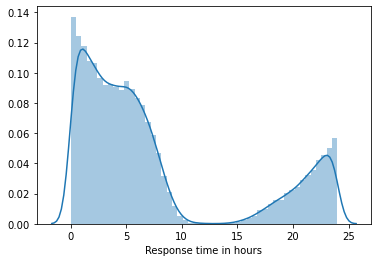

In [66]:
# plotting distrivution of response time
mask = (invoice['Gate Pass Time'] != "00:00:00")
sns.distplot(invoice[mask]['Response time in hours'])

* The curve is U-shaped due to the fact that most workshops are closed during the night. Customers drop their cars during a comfortable time period.
* Let's plot the time when cars are dropped in.

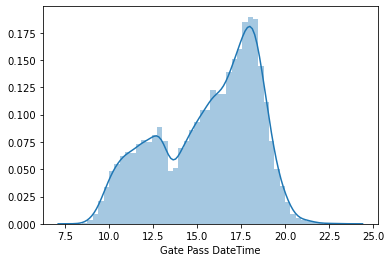

In [133]:
def get_seconds(dt_time):
#     x.to_pydatetime().time().hour * 60 + x.to_pydatetime().time().minute) * 60 + x.to_pydatetime().time().second
    hours = dt_time.to_pydatetime().time().hour * 60 * 60
    minutes = dt_time.to_pydatetime().time().minute * 60
    seconds = dt_time.to_pydatetime().time().second
    return hours + minutes + seconds

sns.distplot(invoice[mask]['Gate Pass DateTime'].apply(lambda x: get_seconds(x)/3600))

* Customers are more likely to drop their cars in the workshops in the evenings.
* A dip around 2 pm is observed, which may be due to lunch time in some workshops or customers not wanting to drop cars during that time.

### Plotting time taken in days for jobs

<Figure size 576x288 with 0 Axes>

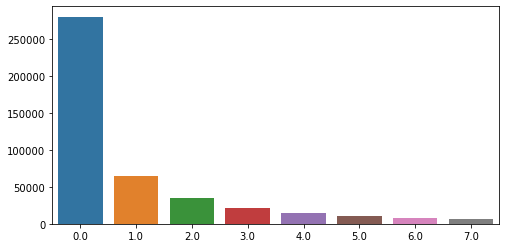

In [134]:
mask = invoice['Total time in days'] <= 7

_ = invoice[mask]['Total time in days'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=_.index, y=_.values)

In [135]:
invoice[ invoice['Gate Pass Time'] != '00:00:00' ][['JobCard Date', 'JobCard Time', 'Invoice Date', 'Invoice Time', 'Gate Pass Time']].head()

,JobCard Date,JobCard Time,Invoice Date,Invoice Time,Gate Pass Time
5676,2015-01-28,11:07:47,2015-01-28,13:18:59,17:50:23
9558,2015-02-05,18:26:31,2015-02-07,19:44:54,11:14:15
10406,2014-12-13,11:19:00,2015-02-28,17:24:52,11:55:58
13982,2015-02-10,14:46:46,2015-02-10,16:18:52,18:16:21
18673,2015-03-31,20:45:10,2015-03-31,21:50:27,21:03:14


#### Looking for customers who have visited different service centers

In [136]:
_ = invoice.groupby(['Customer No.'])

In [143]:
df = (_['Plant']).value_counts().sort_index().to_frame()

df.columns = ['Visits']
df.reset_index(inplace=True)
df.head()

,Customer No.,Plant,Visits
0,1,BC02,4
1,10,BC01,5
2,100,BC11,2
3,1000,BC02,6
4,10000,BC05,7


In [144]:
vc = df['Customer No.'].value_counts()
multi_plant_customers = list(vc[ vc>1 ].index)

In [148]:
# setting a boolean flag to check if a customer has visited other plants
invoice['Visited_Multiple_Plants'] = 0

invoice.set_index('Customer No.', inplace=True)

for cust_no in multi_plant_customers:
    invoice.at[cust_no, 'Visited_Multiple_Plants'] = 1
# multi_plant_customers

invoice.reset_index(inplace=True)

In [152]:
invoice.rename(columns={'District': 'State', 'CITY': 'City', 'Area / Locality': 'District'}, inplace=True)

In [31]:
# find plants visited and number of plants visited

# use plants visited as support for fleet

# relation between kind of service wrt km travelled

# relation between revenue wrt km travelled

# mean parts/value used on type of repair

In [ ]:
# Check for poor job done at workshop
    # group under customer
    # find >1 visits
    # sort based on Jobcard date time
    # check if time range is between subsequent is less than 1 month
    
# busiest garages
    # services done in whole timeframe 
    # services done in a given time period
    # difference
    # distribution of types of jobs
    # seasonal variations
    # busy based on day of the week
    # car drop/pickup day of the week
    
# efficiency of a workshop
    # average time taken for a job by all workshops
    # difference from average
    # use labor costs and parts costs as well

# items/parts demand across nation
    # types of service/make/model according to area/garage
    
# order lucrative jobs
    # types of services with less time and more revenue
    # parts cost vs labor cost
    
# check for technician performance
    # use efficiency level of significane diff from others
    
# order car make/models with highest servicing costs
    # costs breakdown: labor, parts, location

# order district/city/state wrt revenue generated

# overall preference of a garage
    # augment population car density with area, compare with no of services done in a time period wrt workshops
    # check using data if customer has preference to a service center